In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
from scipy.stats import expon


# Question 2A

2.710158817086528

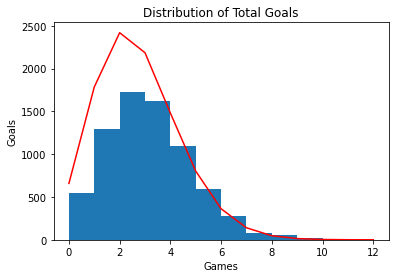

In [185]:
df = pd.read_csv('soccer17.csv', index_col = False)
df['TG'] = df['FTHG'] + df['FTAG']
mean = np.mean(df['TG'])
X = np.arange(0, max(df['TG'])+1)
plt.plot(X, poisson.pmf(X,mean)*np.sum(df['TG']/2), 'r-');
plt.xlabel('Games')
plt.ylabel('Goals')
plt.title("Distribution of Total Goals")
plt.hist(df['TG'], bins=X);
mean

# Question 2B

1.1907174151150055

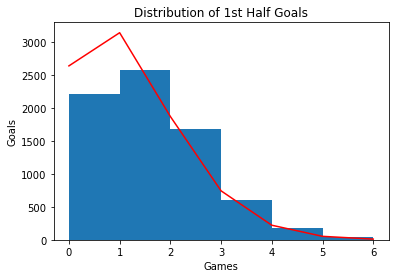

In [186]:
df['1HTG'] = df['HTHG'] + df['HTAG']
mean = np.mean(df['1HTG'])
X = np.arange(0, max(df['1HTG'])+1)
plt.plot(X, poisson.pmf(X,mean)*np.sum(df['1HTG']), 'r-');
plt.xlabel('Games')
plt.ylabel('Goals')
plt.title("Distribution of 1st Half Goals")
plt.hist(df['1HTG'], bins=X);
mean

# Question 2C

1.5194414019715226

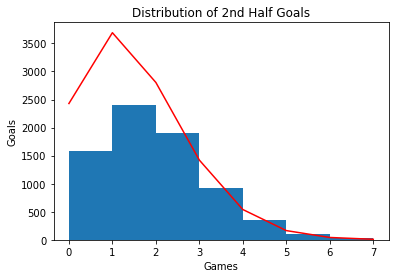

In [187]:
df['2HTG'] = df['TG'] - df['1HTG']
mean = np.mean(df['2HTG'])
X = np.arange(0, max(df['2HTG'])+1)
plt.plot(X, poisson.pmf(X,mean)*np.sum(df['2HTG']), 'r-');
plt.xlabel('Games')
plt.ylabel('Goals')
plt.title("Distribution of 2nd Half Goals")
plt.hist(df['2HTG'], bins=X);
mean

# Question 2D

In [152]:
df2 = pd.DataFrame({'GamesPlayed': (df.groupby(['Div']).size())}).reset_index()

g = np.empty(len(df2))
for i in range(len(df2)):
    div = df2.Div.iat[i]
    TG = df.loc[df.Div == div, 'TG'].sum()
    g[i] = TG
    
df2['GPG'] = g/df2['GamesPlayed']
df2 = df2.sort_values(by=['GPG'], ascending = False)
df2

,Div,GamesPlayed,GPG
0,Bundesliga,1224,2.811275
2,La_Liga,1520,2.759211
4,Serie_A,1520,2.725658
1,EPL,1520,2.686184
3,Ligue_1,1520,2.588158


## Question 2E

In [164]:
df4 = df.loc[(df['TG'] == 4)]
eventgg = df4[abs(df4.pH-df4.pA) < 0.05]
len(eventgg)

eventgg2 = eventgg.groupby(["FTHG", "FTAG"]).size()
eventgg2


FTHG  FTAG
0     4        4
1     3       17
2     2       43
3     1       15
4     0        4
dtype: int64

In [168]:
sigma = np.sqrt(len(eventgg)*.5*.5)

(43-(len(eventgg)*.375))/sigma


2.6069011747551456

In [190]:
len(eventgg), len(df4), sigma

(83, 1096, 4.55521678957215)